<a href="https://colab.research.google.com/github/Outside-Excuse/Asistente-virtual-prototipo1/blob/main/An%C3%A1lisisEncuesta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import plotly.express as px
import pandas as pd

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats
from sklearn.model_selection import KFold
import io

In [ ]:

# Lee el archivo Excel en un DataFrame de pandas
datos_excel = pd.read_excel('/content/sample_data/ENCUESTA.xlsx')

# Muestra los primeros registros del DataFrame para verificar
datos_excel.head()

,LOCALIDAD:,Edad:,Sexo:,Escolaridad:,Ocupación:,Programa:,1.- ¿Qué tiempo demoró la gestión para la ampliación de la red eléctrica en media y baja tensión?,2.- ¿Qué prioridad tiene en la vida de esta localidad la obra de electrificación?,3.- ¿Cómo considera Usted la calidad del servicio de electrificación?,4.- ¿Qué tiempo tardó la obra de ampliación de la red de energía eléctrica en media y baja tensión?,5.- ¿Se publicó en el lugar los datos y características de la obra?,"6.- ¿Se ha realizado algún mantenimiento en la instalación eléctrica (postes, cableado, transformadores, etc.) en su colonia o sector?",7.- ¿Qué tanto le afecta a Usted las fallas del servicio de energía eléctrica en su colonia o sector?,8.- ¿Ha tenido fallas derivadas de la construcción de la obra?,9.- ¿La interconexión de la energía se llevó a tiempo al terminar la obra?,10.- ¿Notó Usted Supervisión del personal del Ayuntamiento?,"11.- En general, ¿Qué tan satisfecho se encuentra Usted con la obra realizada?"
0,Col. Gaviotas Sur Tercera de Monal,36,Hombre,Primaria,Asalariado/Subordinado,K451 - Ampliación de la red de energía eléctri...,Varios años,Mucho,Buena,Varios meses,No,Sí,Poco,No,Sí,Sí,Mucho
1,Col. Gaviotas Sur Tercera de Monal,28,Hombre,Secundaria,Asalariado/Subordinado,K451 - Ampliación de la red de energía eléctri...,Varios meses,Mucho,Buena,Varios meses,No,No,Mucho,No,Sí,No,Mucho
2,Col. Gaviotas Sur Tercera de Monal,18,Hombre,Primaria,Desempleado,K451 - Ampliación de la red de energía eléctri...,Varias semanas,Mucho,Excelente,Varios meses,No,Sí,Mucho,No,Sí,Sí,Mucho
3,Col. Gaviotas Sur Tercera de Monal,64,Mujer,Primaria,Ama de casa,K451 - Ampliación de la red de energía eléctri...,Varios meses,Mucho,Buena,Varios meses,No,No,Poco,No,Sí,Sí,Mucho
4,Col. Gaviotas Sur Tercera de Monal,42,Mujer,Primaria,Ama de casa,K451 - Ampliación de la red de energía eléctri...,Varios meses,Mucho,Buena,Varios meses,No,Sí,Nada,No,No,Sí,Mucho


# **Factores Sociodemográficos**

Escolaridad:
Preparatoria    51
Primaria        81
Profesional      8
Secundaria      80
Sin estudios    20
dtype: int64

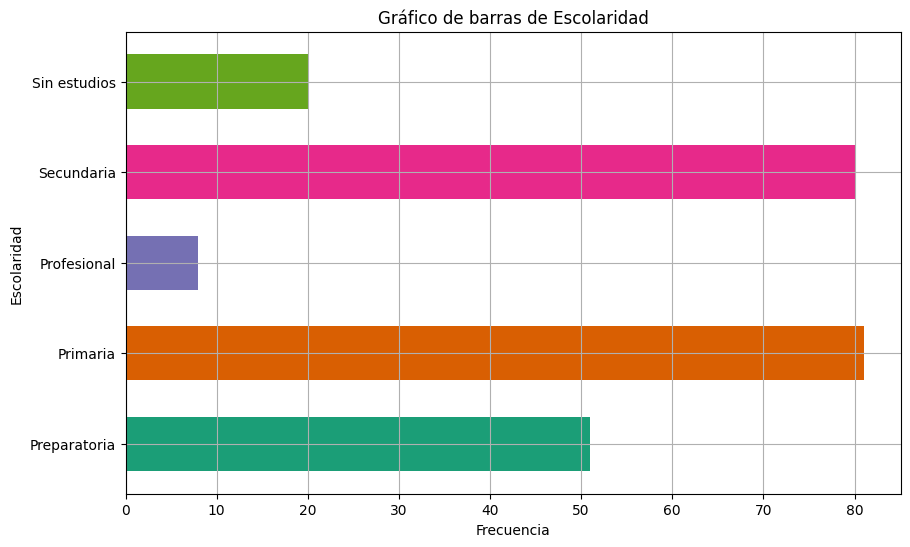

In [ ]:
# @title Escolaridad:

from matplotlib import pyplot as plt
import seaborn as sns

datos_excel.groupby('Escolaridad:').size().plot(
    kind='barh', # un gráfico de barras horizontal
    color=sns.palettes.mpl_palette('Dark2'), # agrega color a las barras
    title='Gráfico de barras de Escolaridad', # agrega título al gráfico
    xlabel='Frecuencia', # etiquetar al eje x
    ylabel='Escolaridad', # etiquetar al eje y
    grid=True, # agrega líneas de cuadrícula al gráfico
    legend=False, # Mostrar una leyenda
    figsize=(10, 6), # tamaño de la figura
    width=0.6, # ancho de las barras
    fontsize=10 # tamaño de la fuente en el gráfico.
)
#plt.gca().spines[['top', 'right',]].set_visible(False) #quitar las líneas del gráfico

datos_excel.groupby('Escolaridad:').size()

Ocupación:
Ama de casa               86
Asalariado/Subordinado    78
Desempleado                7
Estudiante                10
Jubilado/Pensionado        3
Negocio Propio            51
Profesionista              5
dtype: int64

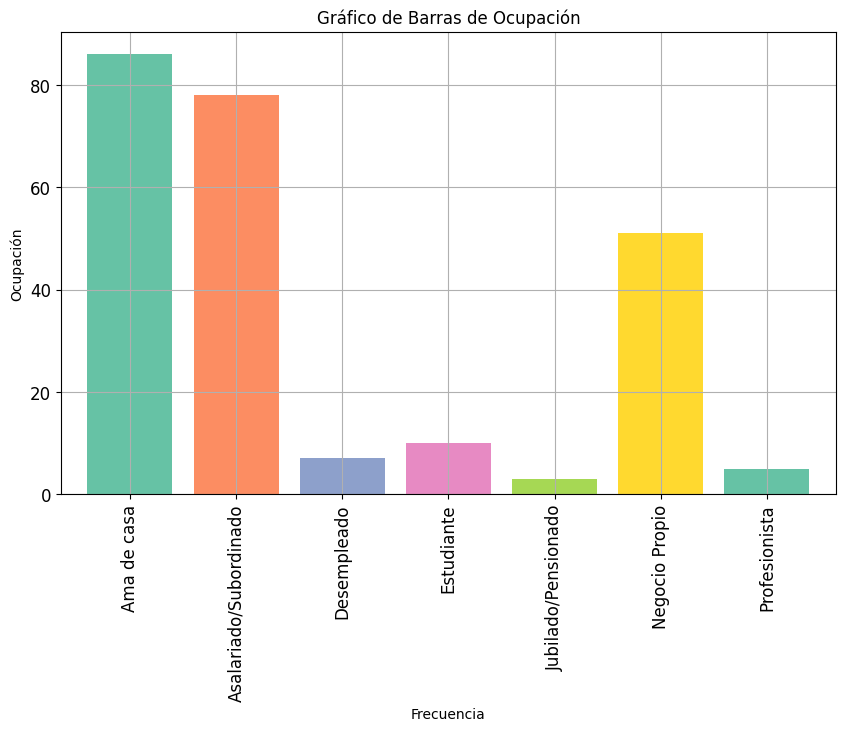

In [ ]:
# @title Ocupación:

datos_excel.groupby('Ocupación:').size().plot(
    kind='bar', # un gráfico de barras vertical
    color=sns.palettes.mpl_palette('Set2'), # agrega color a las barras
    title='Gráfico de Barras de Ocupación', # agrega título al gráfico
    xlabel='Frecuencia', # etiquetar al eje x
    ylabel='Ocupación', # etiquetar al eje y
    grid=True, # agrega líneas de cuadrícula al gráfico
    legend=False, # Mostrar una leyenda
    figsize=(10, 6), # tamaño de la figura
    width=0.8, # ancho de las barras
    fontsize=12 # tamaño de la fuente en el gráfico.
)
# plt.gca().spines[['top', 'right',]].set_visible(False) #quitar las líneas del gráfico

datos_excel.groupby('Ocupación:').size()

([<matplotlib.patches.Wedge at 0x798d2876d090>,
 [Text(1.1414280673892439, 0.14014980191229767, 'Mujer'),
  Text(-1.1414280542674673, -0.14014990878050543, 'Hombre')],
 [Text(0.6451549946113116, 0.07921510542868998, '51.7%'),
  Text(-0.6451549871946554, -0.07921516583245959, '48.3%')])

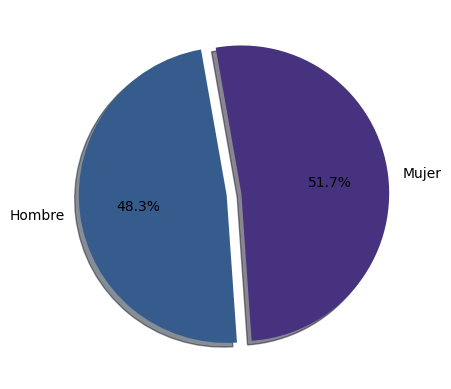

In [ ]:
# @title Sexo:

Variable = datos_excel['Sexo:'].value_counts()

plt.pie(Variable, labels=Variable.index,
        autopct='%1.1f%%', # número de decimales
        startangle=100, # ángulo de rotación del gráfico
        colors=sns.palettes.mpl_palette('viridis'),
        explode=(0.05, 0.05), # separar un sector del pastel del resto
        shadow=True, # agrega sombras al gráfico de pastel
        radius=1, # controla el tamaño del pastel ajustando el radio
        counterclock=False # especifica la dirección en la que se dibujan los sectores del pastel.
)


<Axes: title={'center': 'Edad de las personas'}, ylabel='Frequency'>

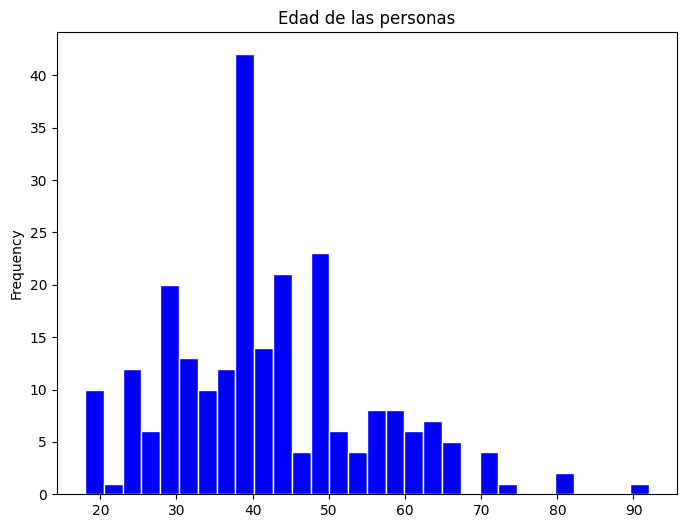

In [ ]:
# @title Edad:

datos_excel['Edad:'].plot(
    kind='hist',
    bins=30, # cantidad de contenedores (bins)
    title='Edad de las personas', # agregar un título al histograma
    xlabel='Edad', # etiquetar eje x
    ylabel='Frecuencia', # etiquetar eje y
    color='blue', # color del histograma
    edgecolor='white', # color del borde de las barras del histograma
    figsize=(8, 6) # controlar el tamaño de la figura
)
#plt.gca().spines[['top', 'right',]].set_visible(False) #quitar las líneas del gráfico

## Preguntas

([<matplotlib.patches.Wedge at 0x798d2912b5b0>,
 [Text(-1.093974074857458, -0.11498140519131432, 'Varios años'),
  Text(1.0991519333954292, 0.04318596199102532, 'Varios meses'),
  Text(0.07194330298690516, 1.097644824683893, 'Varias semanas')],
 [Text(-0.5967131317404315, -0.06271713010435326, ' 53.3%'),
  Text(0.5995374182156885, 0.02355597926783199, ' 44.6%'),
  Text(0.039241801629220995, 0.598715358918487, '  2.1%')])

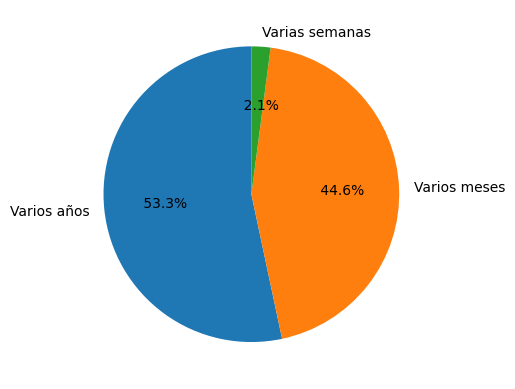

In [ ]:
# @title Pregunta 1:

# Get the values for the pie chart
options = datos_excel['1.- ¿Qué tiempo demoró la gestión para la ampliación de la red eléctrica en media y baja tensión?'].value_counts()

# Create the pie chart
plt.pie(options, labels=options.index, autopct='%1.1f%%', startangle=90)


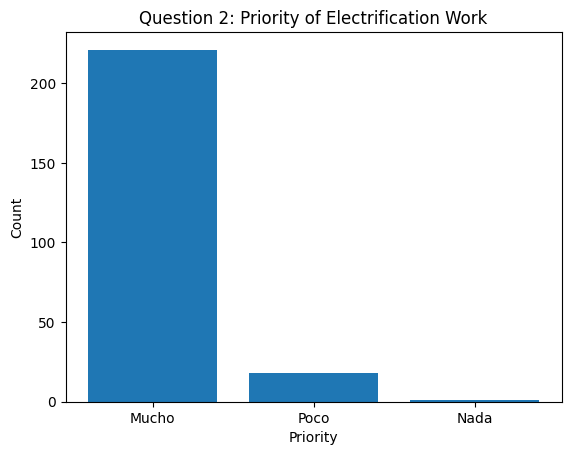

In [ ]:
# prompt: Using dataframe datos_excel: Gráfico de barras de la pregunta 2

import matplotlib.pyplot as plt

# Get the data from the dataframe
question_2_data = datos_excel["2.- \u00bfQu\u00e9 prioridad tiene en la vida de esta localidad la obra de electrificaci\u00f3n?"].value_counts()

# Prepare the bar chart
plt.bar(question_2_data.index, question_2_data.values)
plt.xlabel("Priority")
plt.ylabel("Count")
plt.title("Question 2: Priority of Electrification Work")

# Show the chart
plt.show()

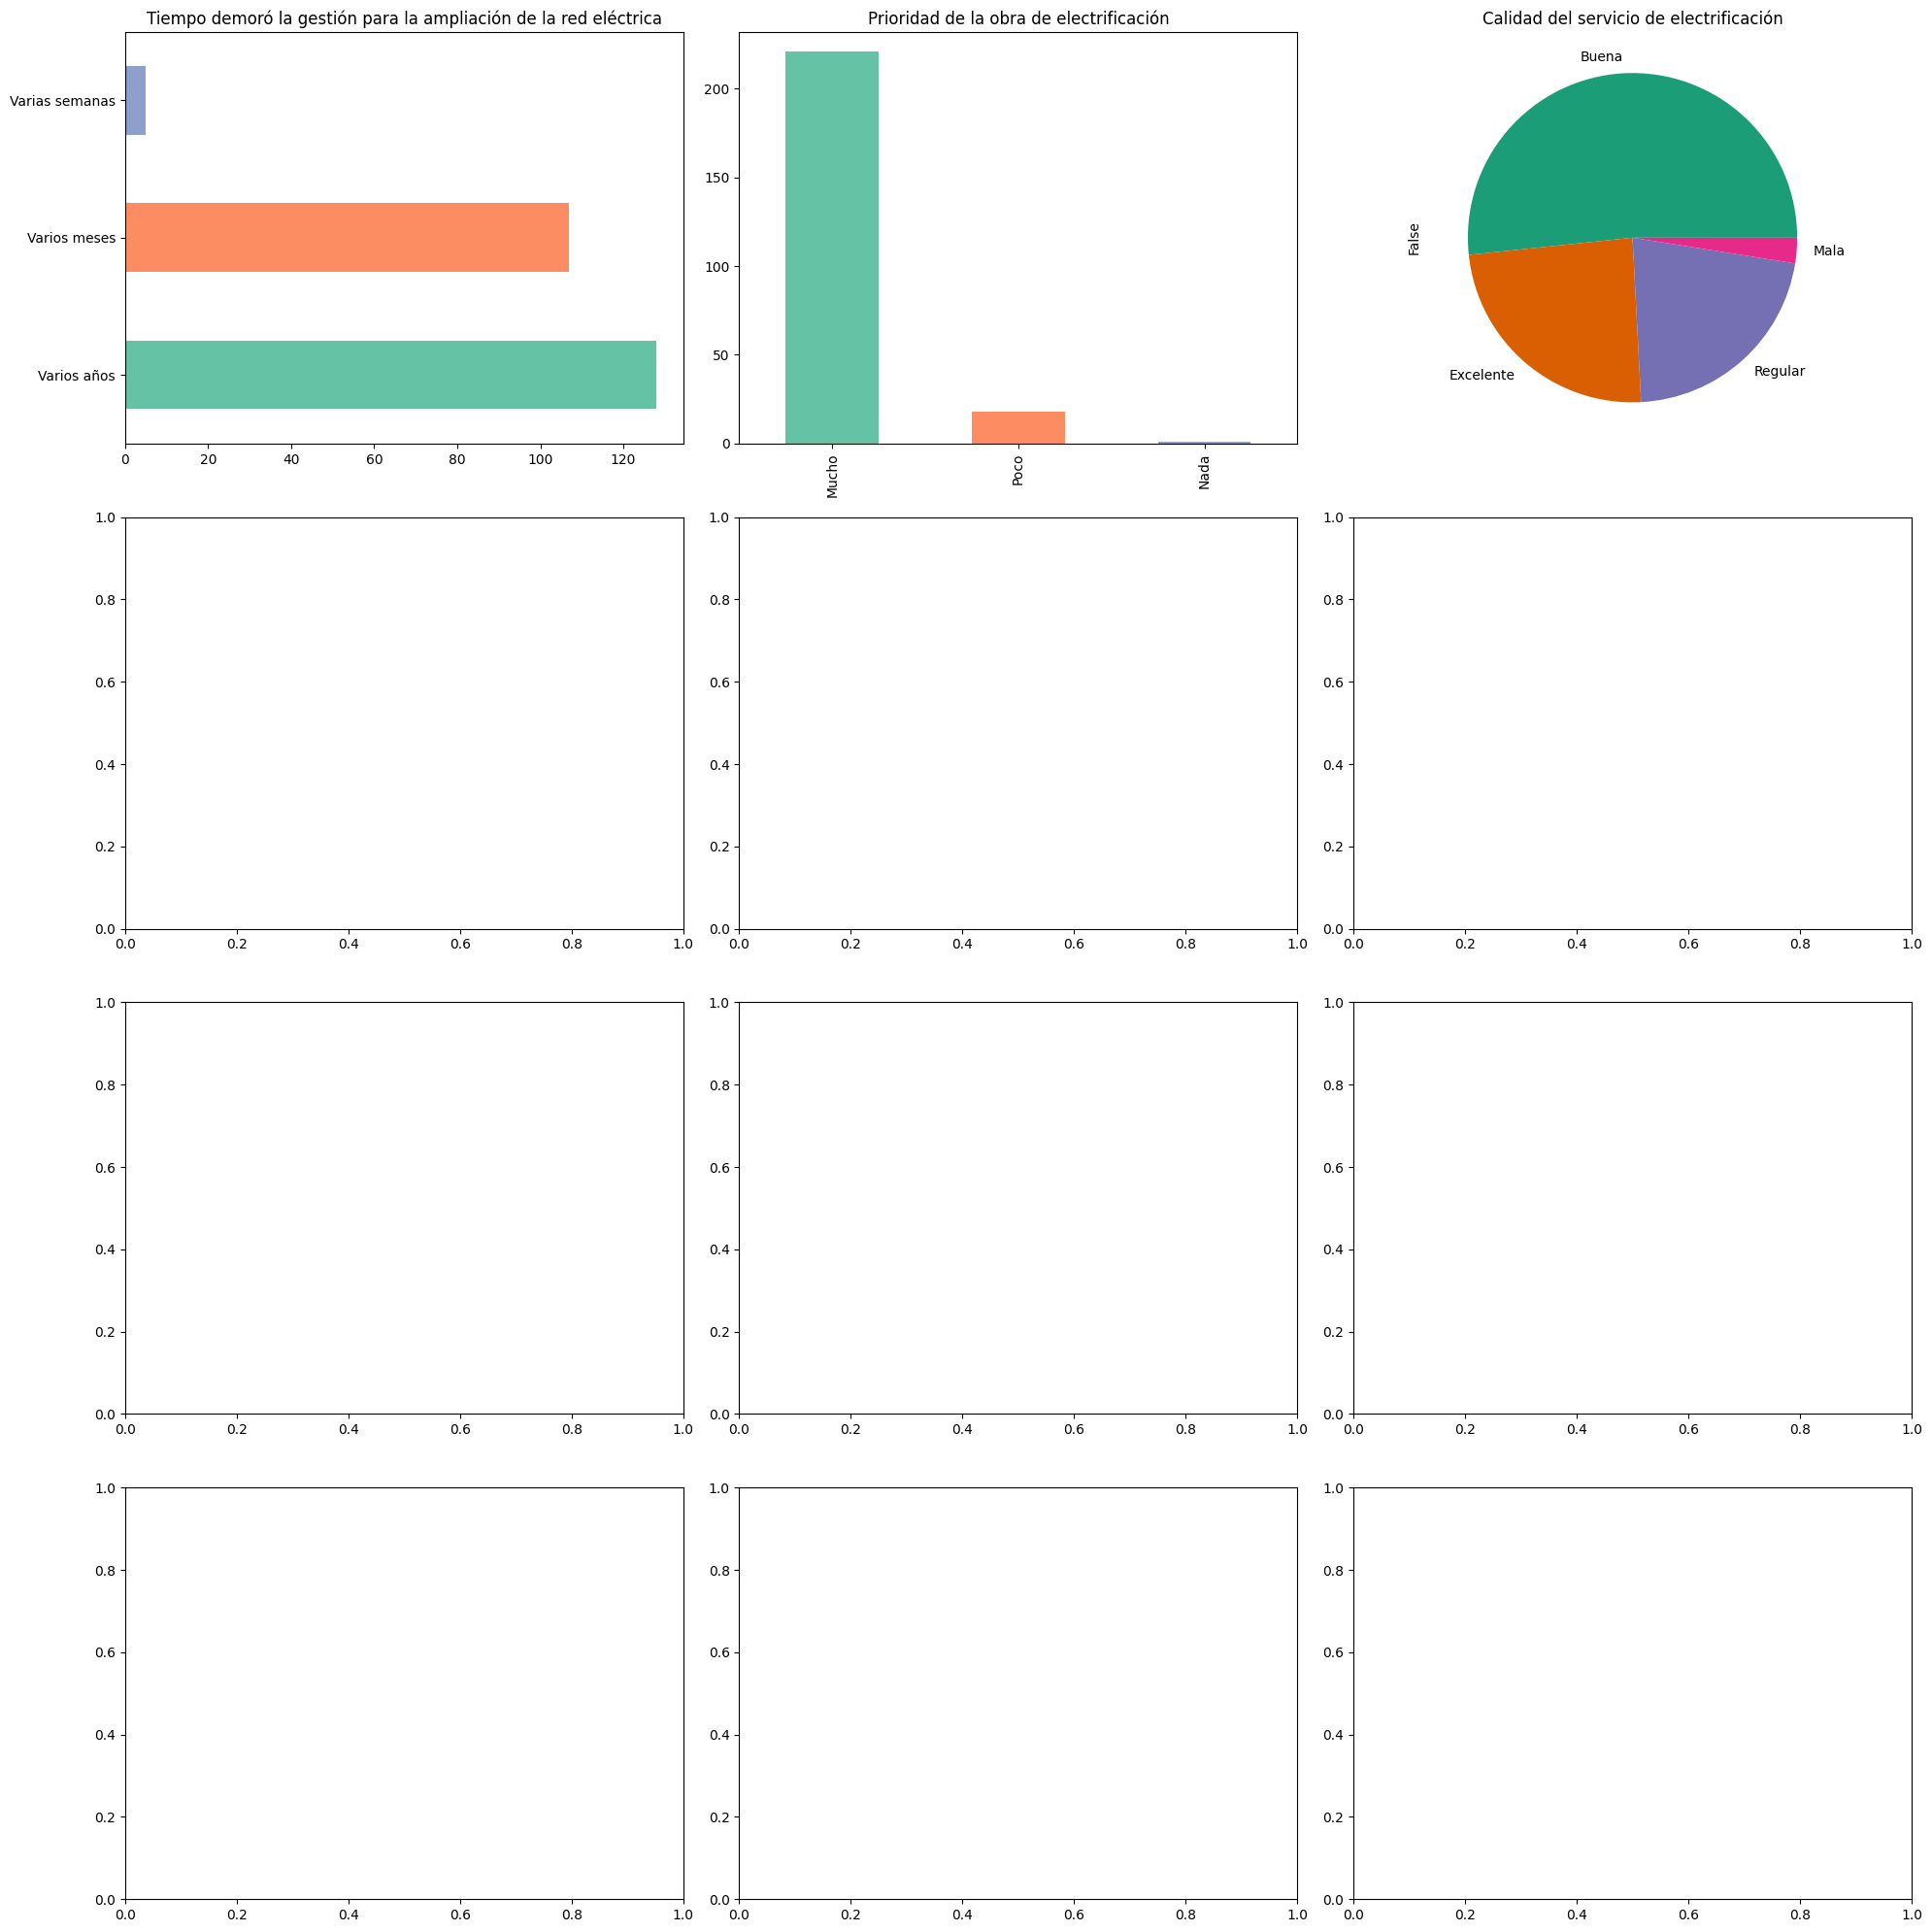

In [ ]:
# Crear una figura y una cuadrícula de subgráficos
fig, axs = plt.subplots(4, 3, figsize=(20, 20))

# Pregunta: 1.
preg_1 = datos_excel["1.- ¿Qué tiempo demoró la gestión para la ampliación de la red eléctrica en media y baja tensión?"].value_counts()
preg_1.plot( kind='barh', color=sns.palettes.mpl_palette('Set2'), ax=axs[0, 0])
axs[0, 0].set_title('Tiempo demoró la gestión para la ampliación de la red eléctrica')

# Pregunta: 2.
preg_2 = datos_excel["2.- ¿Qué prioridad tiene en la vida de esta localidad la obra de electrificación?"].value_counts()
preg_2.plot( kind='bar', color=sns.palettes.mpl_palette('Set2'), ax=axs[0, 1])
axs[0, 1].set_title('Prioridad de la obra de electrificación')

# Pregunta: 3.
preg_3 = datos_excel["3.- ¿Cómo considera Usted la calidad del servicio de electrificación?"].value_counts()
preg_3.plot( kind='pie', colors=sns.palettes.mpl_palette('Dark2'), ax=axs[0, 2],ylabel=False)
axs[0, 2].set_title('Calidad del servicio de electrificación')


plt.tight_layout()

# Mostrar la figura
plt.show()

## Análisis considerando variables tipo fecha

In [ ]:

# Lee el archivo Excel en un DataFrame de pandas
datos_excel2 = pd.read_excel('/content/sample_data/ENCUESTA_2.xlsx')

# Muestra los primeros registros del DataFrame para verificar
datos_excel2.head()

,LOCALIDAD:,Edad:,Sexo:,Escolaridad:,Fecha entrevista,Ocupación:,Programa:,1.- ¿Qué tiempo demoró la gestión para la ampliación de la red eléctrica en media y baja tensión?,2.- ¿Qué prioridad tiene en la vida de esta localidad la obra de electrificación?,3.- ¿Cómo considera Usted la calidad del servicio de electrificación?,4.- ¿Qué tiempo tardó la obra de ampliación de la red de energía eléctrica en media y baja tensión?,5.- ¿Se publicó en el lugar los datos y características de la obra?,"6.- ¿Se ha realizado algún mantenimiento en la instalación eléctrica (postes, cableado, transformadores, etc.) en su colonia o sector?",7.- ¿Qué tanto le afecta a Usted las fallas del servicio de energía eléctrica en su colonia o sector?,8.- ¿Ha tenido fallas derivadas de la construcción de la obra?,9.- ¿La interconexión de la energía se llevó a tiempo al terminar la obra?,10.- ¿Notó Usted Supervisión del personal del Ayuntamiento?,"11.- En general, ¿Qué tan satisfecho se encuentra Usted con la obra realizada?"
0,Col. Gaviotas Sur Tercera de Monal,19,Hombre,Preparatoria,2020-12-13,Estudiante,K451 - Ampliación de la red de energía eléctri...,Varios meses,Mucho,Buena,Varios meses,No,Sí,Poco,No,Sí,Sí,Mucho
1,Col. Gaviotas Sur Tercera de Monal,30,Hombre,Preparatoria,2020-12-13,Asalariado/Subordinado,K451 - Ampliación de la red de energía eléctri...,Varios años,Nada,Mala,Varios meses,No,No,Nada,Sí,Sí,Sí,Poco
2,Col. Gaviotas Sur Tercera de Monal,50,Hombre,Preparatoria,2020-12-13,Negocio Propio,K451 - Ampliación de la red de energía eléctri...,Varios años,Mucho,Excelente,Varios meses,No,No,Nada,No,Sí,No,Mucho
3,Col. Gaviotas Sur Tercera de Monal,45,Mujer,Preparatoria,2021-10-26,Asalariado/Subordinado,K451 - Ampliación de la red de energía eléctri...,Varios años,Mucho,Excelente,Varios meses,No,Sí,Mucho,No,Sí,No,Mucho
4,Col. Gaviotas Sur Tercera de Monal,41,Mujer,Preparatoria,2021-10-26,Ama de casa,K451 - Ampliación de la red de energía eléctri...,Varios años,Mucho,Buena,Varias semanas,No,Sí,Mucho,No,Sí,No,Mucho


In [ ]:
datos_excel2['Fecha entrevista'] = pd.to_datetime(datos_excel2['Fecha entrevista'])
datos_excel2['Fecha entrevista'] = datos_excel2['Fecha entrevista'].dt.strftime('%d-%m-%Y')

In [ ]:
datos_excel2

,LOCALIDAD:,Edad:,Sexo:,Escolaridad:,Fecha entrevista,Ocupación:,Programa:,1.- ¿Qué tiempo demoró la gestión para la ampliación de la red eléctrica en media y baja tensión?,2.- ¿Qué prioridad tiene en la vida de esta localidad la obra de electrificación?,3.- ¿Cómo considera Usted la calidad del servicio de electrificación?,4.- ¿Qué tiempo tardó la obra de ampliación de la red de energía eléctrica en media y baja tensión?,5.- ¿Se publicó en el lugar los datos y características de la obra?,"6.- ¿Se ha realizado algún mantenimiento en la instalación eléctrica (postes, cableado, transformadores, etc.) en su colonia o sector?",7.- ¿Qué tanto le afecta a Usted las fallas del servicio de energía eléctrica en su colonia o sector?,8.- ¿Ha tenido fallas derivadas de la construcción de la obra?,9.- ¿La interconexión de la energía se llevó a tiempo al terminar la obra?,10.- ¿Notó Usted Supervisión del personal del Ayuntamiento?,"11.- En general, ¿Qué tan satisfecho se encuentra Usted con la obra realizada?"
0,Col. Gaviotas Sur Tercera de Monal,19,Hombre,Preparatoria,13-12-2020,Estudiante,K451 - Ampliación de la red de energía eléctri...,Varios meses,Mucho,Buena,Varios meses,No,Sí,Poco,No,Sí,Sí,Mucho
1,Col. Gaviotas Sur Tercera de Monal,30,Hombre,Preparatoria,13-12-2020,Asalariado/Subordinado,K451 - Ampliación de la red de energía eléctri...,Varios años,Nada,Mala,Varios meses,No,No,Nada,Sí,Sí,Sí,Poco
2,Col. Gaviotas Sur Tercera de Monal,50,Hombre,Preparatoria,13-12-2020,Negocio Propio,K451 - Ampliación de la red de energía eléctri...,Varios años,Mucho,Excelente,Varios meses,No,No,Nada,No,Sí,No,Mucho
3,Col. Gaviotas Sur Tercera de Monal,45,Mujer,Preparatoria,26-10-2021,Asalariado/Subordinado,K451 - Ampliación de la red de energía eléctri...,Varios años,Mucho,Excelente,Varios meses,No,Sí,Mucho,No,Sí,No,Mucho
4,Col. Gaviotas Sur Tercera de Monal,41,Mujer,Preparatoria,26-10-2021,Ama de casa,K451 - Ampliación de la red de energía eléctri...,Varios años,Mucho,Buena,Varias semanas,No,Sí,Mucho,No,Sí,No,Mucho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,"Colonia Gaviotas Sur 2da, Entrada de Monal (Et...",52,Mujer,Sin estudios,10-11-2022,Ama de casa,K456 - Ampliación de la red de energía eléctri...,Varios meses,Mucho,Buena,Varios meses,No,No sabe,Mucho,No,Sí,No,Poco
236,"Colonia Gaviotas Sur 2da, Entrada de Monal (Et...",51,Mujer,Sin estudios,26-10-2021,Negocio Propio,K456 - Ampliación de la red de energía eléctri...,Varios meses,Mucho,Regular,Varios meses,Sí,No sabe,Mucho,No,No,No,Mucho
237,Colonia Gaviotas Sur 2da. Entrada de Monal,56,Hombre,Sin estudios,26-10-2021,Asalariado/Subordinado,K457 - Ampliación de la red de energía eléctri...,Varios años,Mucho,Buena,Casi un año,Sí,No sabe,Mucho,No,Sí,Sí,Mucho
238,Colonia Gaviotas Sur 2da. Entrada de Monal,63,Mujer,Sin estudios,26-10-2021,Ama de casa,K457 - Ampliación de la red de energía eléctri...,Varios años,Mucho,Excelente,Varios meses,No,No,Poco,No,Sí,No,Mucho


In [ ]:


import altair as alt

# Crea un gráfico de dispersión con Altair
chart = alt.Chart(datos_excel2).mark_bar().encode(
    x='Fecha entrevista',  # Edad como variable cuantitativa
    y='Edad:'  # Fecha como variable temporal

).properties(
    width=800,  # Puedes ajustar el ancho
    height=400  # Puedes ajustar la altura
).interactive()


# Muestra el gráfico
chart

alt.Chart(...)

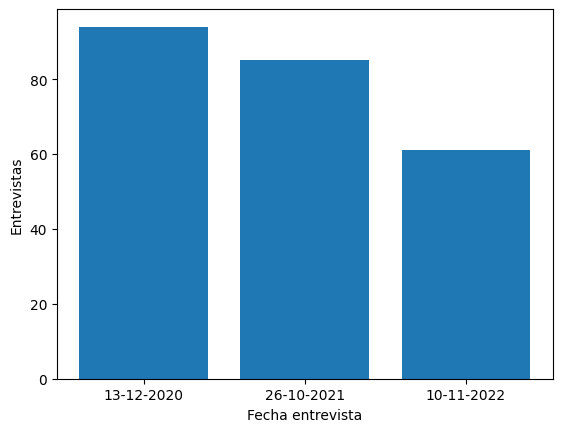

In [ ]:
# Get the data from the dataframe
question_2_data = datos_excel2["Fecha entrevista"].value_counts()

# Prepare the bar chart
plt.bar(question_2_data.index, question_2_data.values )
plt.xlabel("Fecha entrevista")
plt.ylabel("Entrevistas")
# plt.title("...")

# Show the chart
plt.show()